## CSC 580: Critical Thinking 3 - Predicting Feul Efficiency Using Tensorflow
In a nutshell, this is a *regression* problem where a **neural network** will be created with the ```tf.keras``` API and will utilize the [**Auto MPG**](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset. The trained model will be used to predict the feul efficiency of late 1970s and early 1980s automobiles

In [15]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

#### Data Preparations & Preprocessing

In [16]:
# Download the dataset
data_file = keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [17]:
# Importing into Pandas
column_names =["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]
raw_data = pd.read_csv(data_file, names=column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)
dataset=raw_data.copy()

In [18]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [19]:
# Train/test dataset split
train_dataset = dataset.sample(frac=0.8, random_state=0) 
test_dataset = dataset.drop(train_dataset.index)

# Had to include because some missing values made it through. Fixes an issue of getting loss and metrics with 'nan' value
train_dataset.dropna(inplace=True)
test_dataset.dropna(inplace=True)

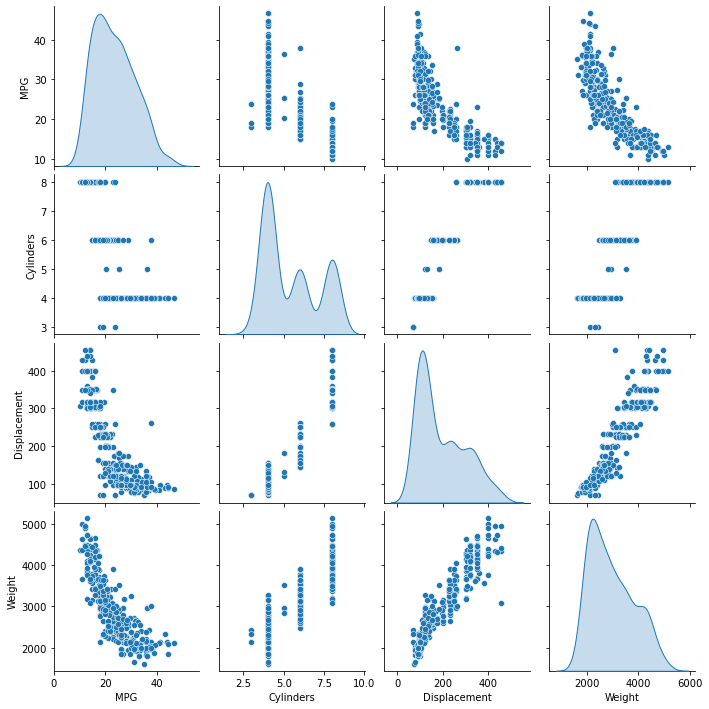

In [20]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [21]:
# Info on training data
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,5.444089,1.688262,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,193.985623,104.254038,70.0,101.0,151.0,260.0,455.0
Horsepower,313.0,104.067093,38.674662,46.0,75.0,92.0,120.0,230.0
Weight,313.0,2969.731629,848.255781,1613.0,2219.0,2790.0,3609.0,5140.0
Acceleration,313.0,15.573802,2.801033,8.0,13.8,15.5,17.3,24.8
Model Year,313.0,75.891374,3.691773,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.555911,0.803182,1.0,1.0,1.0,2.0,3.0


In [22]:
# Normalize the data
def norm(x):
    return (x-train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Separate features and labels
X_train, Y_train = normed_train_data.drop("MPG", axis=1), train_dataset["MPG"]
X_test, Y_test = normed_test_data.drop("MPG", axis=1), test_dataset["MPG"]

#### Constructing the Model

In [23]:
# Model structure was given in assingment parameters
def build_model(loss: str = 'mse'):
    model = keras.Sequential()
    model.add(keras.layers.Input(len(X_train.keys())))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae','mse'])

    return model

In [24]:
model_mse = build_model('mse')
model_mse.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_mae = build_model('mae')
model_mae.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Ensuring the model works (Step was required in assignment instructions)
model_mse.predict(X_train[0:10])

array([[-0.44495142],
       [-0.03148293],
       [-0.17383835],
       [-0.01236703],
       [-0.15069391],
       [-0.11701743],
       [-0.07440232],
       [-0.10715958],
       [-0.6716051 ],
       [-0.04215479]], dtype=float32)

#### Training the Model

##### MSE MODEL

In [27]:
# Train the MSE model
EPOCHS = 1000
history = model_mse.fit(X_train, Y_train, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:600.0019,  mae:23.1721,  mse:600.0019,  val_loss:575.1356,  val_mae:22.7886,  val_mse:575.1356,  
....................................................................................................
Epoch: 100, loss:7.1523,  mae:1.9363,  mse:7.1523,  val_loss:6.6150,  val_mae:1.8654,  val_mse:6.6150,  
....................................................................................................
Epoch: 200, loss:5.9023,  mae:1.7288,  mse:5.9023,  val_loss:6.4324,  val_mae:1.7541,  val_mse:6.4324,  
....................................................................................................
Epoch: 300, loss:5.0564,  mae:1.6262,  mse:5.0564,  val_loss:5.4939,  val_mae:1.5956,  val_mse:5.4939,  
....................................................................................................
Epoch: 400, loss:4.8629,  mae:1.5575,  mse:4.8629,  val_loss:5.2277,  val_mae:1.5156,  val_mse:5.2277,  
..............................................................

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.974388,1.178270,2.974388,7.250400,1.879659,7.250400,995
996,3.280601,1.200196,3.280601,6.706030,1.733703,6.706030,996
997,3.011306,1.185988,3.011306,6.667385,1.735648,6.667385,997
998,3.241200,1.201166,3.241200,6.531530,1.704895,6.531530,998
999,3.053640,1.183640,3.053640,7.756103,1.932712,7.756103,999


In [29]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

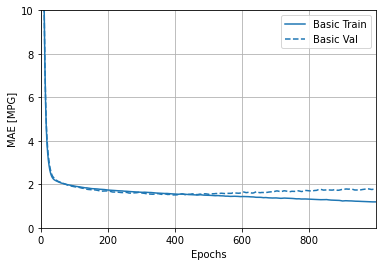

In [30]:
plotter.plot({'Basic': history}, metric = "mae")  
plt.ylim([0, 10])  
plt.ylabel('MAE [MPG]')    

Text(0, 0.5, 'MSE [MPG^2]')

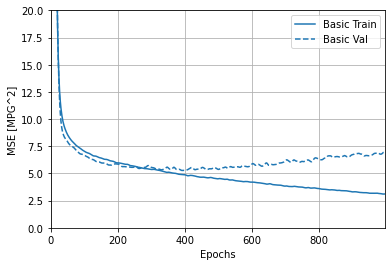

In [31]:
plotter.plot({'Basic': history}, metric = "mse")  
plt.ylim([0, 20])  
plt.ylabel('MSE [MPG^2]')    

##### MAE MODEL

In [32]:
# Train the MSE model
EPOCHS = 1000
history = model_mae.fit(X_train, Y_train, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:23.2791,  mae:23.2791,  mse:606.3379,  val_loss:22.8399,  val_mae:22.8399,  val_mse:579.8325,  
....................................................................................................
Epoch: 100, loss:1.7674,  mae:1.7674,  mse:7.5533,  val_loss:1.8451,  val_mae:1.8451,  val_mse:5.9668,  
....................................................................................................
Epoch: 200, loss:1.6391,  mae:1.6391,  mse:6.6597,  val_loss:1.8257,  val_mae:1.8257,  val_mse:6.0454,  
....................................................................................................
Epoch: 300, loss:1.5160,  mae:1.5160,  mse:6.2956,  val_loss:1.7272,  val_mae:1.7272,  val_mse:5.7991,  
....................................................................................................
Epoch: 400, loss:1.4639,  mae:1.4639,  mse:5.9213,  val_loss:1.7835,  val_mae:1.7835,  val_mse:6.4137,  
................................................................

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.096648,1.096648,3.986727,1.521570,1.521570,4.952851,995
996,1.148671,1.148671,4.229355,1.566673,1.566673,4.974566,996
997,1.086435,1.086435,3.998341,1.550583,1.550583,4.955014,997
998,1.114483,1.114483,4.076261,1.641827,1.641827,5.282415,998
999,1.144373,1.144373,4.098457,1.683890,1.683890,5.597596,999


Text(0, 0.5, 'MAE [MPG]')

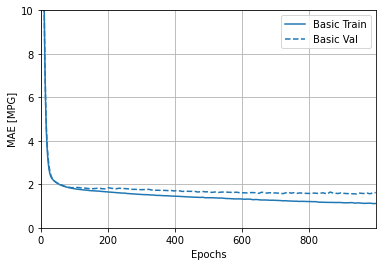

In [34]:
plotter.plot({'Basic': history}, metric = "mae")  
plt.ylim([0, 10])  
plt.ylabel('MAE [MPG]')  

Text(0, 0.5, 'MSE [MPG^2]')

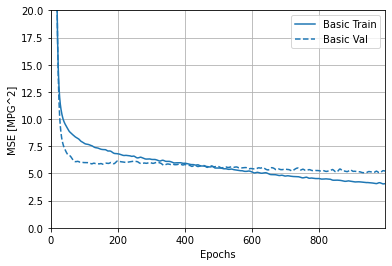

In [35]:
plotter.plot({'Basic': history}, metric = "mse")  
plt.ylim([0, 20])  
plt.ylabel('MSE [MPG^2]')    